### Import data

In [1]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import G1, G2, and population data
conc, popl, g2l, g1l, g2_0l, g1_0l = setup_data("lapatinib");
conc_l = append!([0.1], conc[2:end]);

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:37


### Hill model, residual functions and optimization

In [2]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, ec50_gamma1, gamma1_max, ec50_gamma2, gamma2_max]
# guess
ec50low = 50.0
ec50high = 500.0
ec50guess = 100.0
guess = [ec50guess, 1.0, 0.00682578, 0.00958013, 0.00503788, 0.0933964, 15.0, 15.0, 20.0, 20.94827, ec50guess, 0.00294624, ec50guess, 0.0422821]
# max num of steps
num_steps=5000

best_fit, params = optimize_hill(guess, conc_l, g1l, g2l, g1_0l, g2_0l, num_steps, ec50low, ec50high)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
100.13 secs, 705 evals, 610 steps, improv/step: 0.372 (last = 0.3721), fitness=27833.606084857
200.14 secs, 1416 evals, 1321 steps, improv/step: 0.307 (last = 0.2504), fitness=13526.427454633
300.24 secs, 2130 evals, 2035 steps, improv/step: 0.269 (last = 0.2003), fitness=13526.427454633
400.29 secs, 2842 evals, 2747 steps, improv/step: 0.256 (last = 0.2163), fitness=11695.724355806
500.41 secs, 3553 evals, 3458 steps, improv/step: 0.247 (last = 0.2152), fitness=10041.198607683


┌ Warning: Optimization interrupted, recovering intermediate results...
└ @ BlackBoxOptim /home/farnazm/.julia/packages/BlackBoxOptim/ZdVko/src/opt_controller.jl:458


(9424.140064392295, [57.91185888483735, 1.2706800583919375, 0.005374699570513221, 0.04616678276934994, 0.03164137859670393, 0.02934958469856811, 39.465149740204446, 10.171119403027522, 12.610791449414437, 12.660484907983797, 159.57996523245106, 0.006644970816194065, 197.13340199430056, 0.008164205714899002])

In [3]:
pars=getDDEparams(params, conc_l)

6×8 Array{Float64,2}:
  0.0461542    0.0444293    0.0422126    …   0.010877     0.00785079
  0.0293503    0.0294472    0.0295717        0.0313322    0.0315023 
 10.1802      11.4189      13.0108          35.5138      37.687     
 12.6605      12.6584      12.6557          12.6175      12.6138    
  5.65582e-7   8.05532e-5   0.000191082      0.00424522   0.00538364
  5.31251e-7   7.58787e-5   0.000180704  …   0.00469364   0.00624909

### Plot the data with the new set of parameters for DDE

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Bool, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/plot.jl:29
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/plot.jl:29


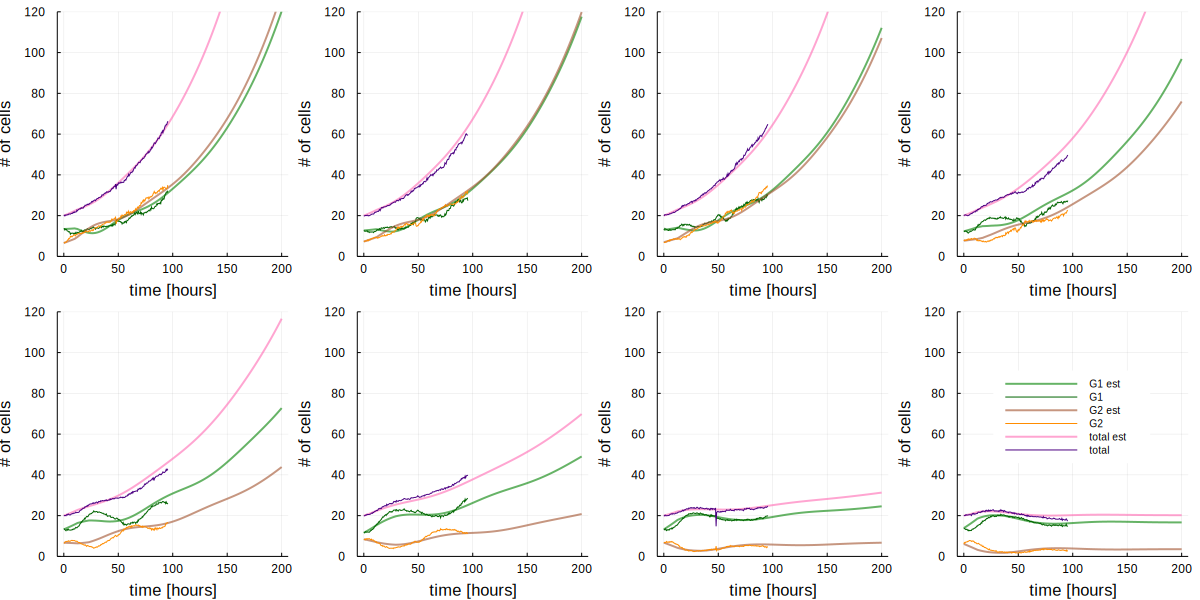

In [4]:
plot_all(pars, popl, g2l, g1l, g2_0l, g1_0l)

### Plot Hill curve for all of the DDE model parameters

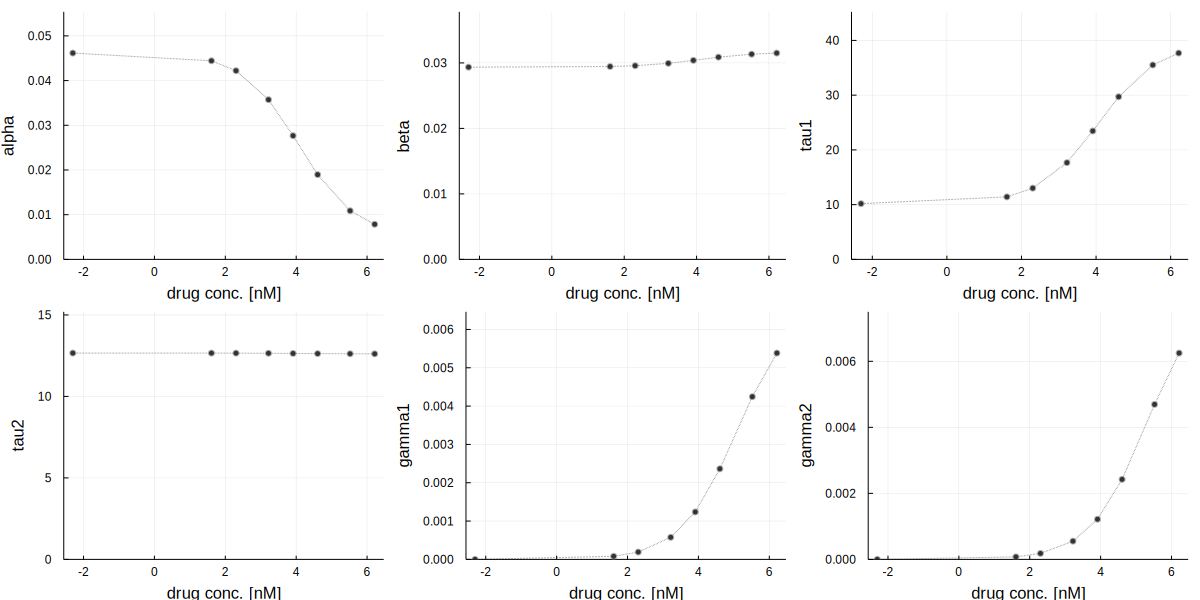

In [5]:
plot_parameters(conc_l, pars)